In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df=pd.read_csv('height-weight.csv')

In [3]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0, 0.5, 'Height')

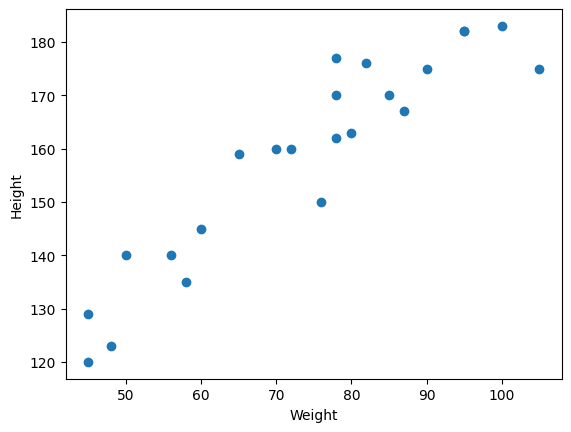

In [4]:
## Scatter plot Weight and Height 
plt.scatter(df['Weight'],df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')

In [5]:
## Finding correlation 
df.corr()

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


In [6]:
## Seaborn for visualization 
import seaborn as sns

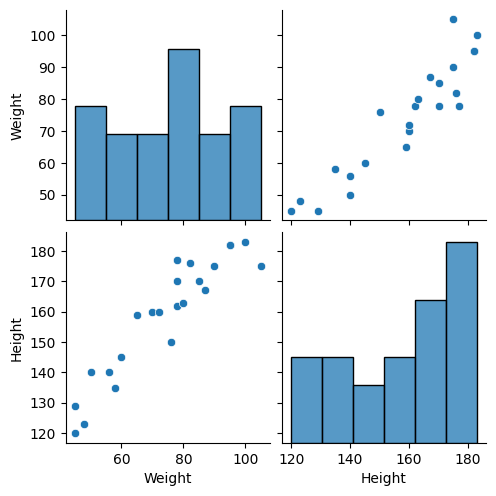

In [7]:
sns.pairplot(df)

In [21]:
## Independent and dependent features 
x=df[['Weight']]  ## Independent Feature should be DataFrame or 2D dimensional array
y=df['Height'] ## This Variable can be in one dimensional array 

In [22]:
np.array(x).shape

(23, 1)

In [23]:
## Train Test Split 
from sklearn.model_selection import train_test_split



In [25]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [28]:
x_train.shape  ## This is the two dimensional 

(17, 1)

In [29]:
y_train.shape  ## This is the one dimensional 

(17,)

In [32]:
## Standardization 
from sklearn.preprocessing import StandardScaler

In [34]:
scaler=StandardScaler()
scaler.fit_transform(x_train)

array([[-0.87662801],
       [ 1.66773133],
       [ 0.33497168],
       [-1.48242785],
       [ 1.36483141],
       [-1.6641678 ],
       [-0.75546804],
       [-0.1496682 ],
       [ 0.21381171],
       [-1.36126788],
       [-0.99778797],
       [-0.02850823],
       [ 1.06193149],
       [ 0.57729161],
       [ 0.75903157],
       [ 0.88019153],
       [ 0.45613165]])

In [37]:
x_test=scaler.transform(x_test)

In [38]:
x_test

array([[ 0.33497168],
       [ 0.33497168],
       [-1.6641678 ],
       [ 1.36483141],
       [-0.45256812],
       [ 1.97063125]])

In [39]:
## Apply Simple  Linear Regression 
from sklearn.linear_model import LinearRegression

In [41]:
regression=LinearRegression(n_jobs=-1)     


In [42]:
regression.fit(x_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,-1
,positive,False


In [46]:
print('Coefficient or slope : ',regression.coef_)
print('Intercept : ', regression.intercept_)

Coefficient or slope :  [1.04792503]
Intercept :  80.52684512622542


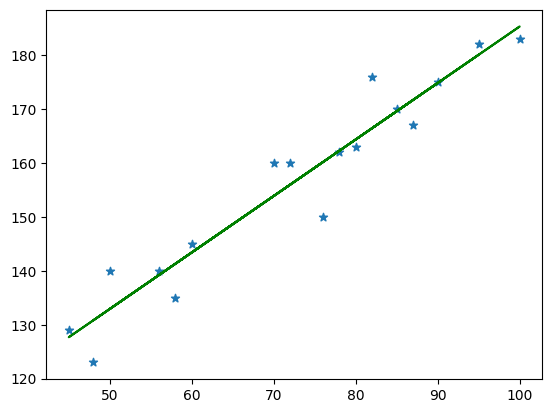

In [52]:
  ## Plot Training data plot best fit line

plt.scatter(x_train,y_train,marker='*')
plt.plot(x_train,regression.predict(x_train),color='green')

### Prediction of test data
1. predicted height ooutput= intercept + coef_(Weights)
2. y_pred_rest=80.52 + 1.047(x_test)

In [55]:
## Predication for test data 

y_pred=regression.predict(x_test)

C:\Users\Madhav Yadav\myenv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [57]:
## Prformance Metrics 
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [58]:
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

7276.932884039703
82.97662409755102
85.3049405605543


In [59]:
from sklearn.metrics import r2_score

In [60]:
score=r2_score(y_test,y_pred)

In [61]:
print(score)

-15.723241865651406


In [64]:
## Adjusted r squared 

ars=1-(1-score) * (len(y_test)-1) / (len(y_test)-x_test.shape[1]-1)

In [65]:
ars

-19.904052332064257

In [67]:
## OLS Linear Regression

import statsmodels.api as sm

In [68]:
model=sm.OLS(y_train,x_train).fit()

In [69]:
prediction=model.predict(x_test)
prediction

array([ 0.70487577,  0.70487577, -3.5018828 ,  2.87199382, -0.95233215,
        4.14676914])

In [72]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.986
Model:                            OLS   Adj. R-squared (uncentered):              0.985
Method:                 Least Squares   F-statistic:                              1133.
Date:                Fri, 17 Oct 2025   Prob (F-statistic):                    2.80e-16
Time:                        11:31:56   Log-Likelihood:                         -73.806
No. Observations:                  17   AIC:                                      149.6
Df Residuals:                      16   BIC:                                      150.4
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

C:\Users\Madhav Yadav\myenv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=17 observations were given.
  return hypotest_fun_in(*args, **kwds)


In [78]:
## Predictor for new data
regression.predict(scaler.transform([[123]]))

C:\Users\Madhav Yadav\myenv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\Madhav Yadav\myenv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([83.734618])